<a href="https://colab.research.google.com/github/priyanshipathakk/Daily-transaction-in-household-report/blob/main/Daily_Transaction_Data_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
money = pd.read_csv("//content/transaction.csv.csv")

In [4]:
money.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [5]:
money.tail()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
2456,1/1/2015,Cash,Transportation,NaN,share jeep - Place T base to top,20.0,Expense,INR
2457,1/1/2015,Cash,Transportation,NaN,share auto - Place H to Place T base,20.0,Expense,INR
2458,1/1/2015,Cash,Transportation,NaN,bus - brc to Place H,30.0,Expense,INR
2459,1/1/2015,Cash,Food,NaN,tea,10.0,Expense,INR
2460,1/1/2015,Cash,Transportation,NaN,share auto - hospital to brc station,10.0,Expense,INR


In [6]:
money.shape

(2461, 8)

In [7]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


In [8]:
money.isnull().sum()

,0
Date,0
Mode,0
Category,0
Subcategory,635
Note,521
Amount,0
Income/Expense,0
Currency,0


In [9]:
money["Mode"].value_counts()

,count
Mode,
Saving Bank account 1,1223
Cash,1046
Credit Card,162
Equity Mutual Fund B,11
Share Market Trading,5
Saving Bank account 2,5
Recurring Deposit,3
Debit Card,2
Equity Mutual Fund C,1


In [10]:
money["Category"].value_counts()

,count
Category,
Food,907
Transportation,307
Household,176
subscription,143
Other,126
Investment,103
Health,94
Family,71
Apparel,47


In [11]:
money['Subcategory'] = money['Subcategory'].fillna('Unknown')
money['Note'] = money['Note'].fillna('Unknown')
money.drop_duplicates(inplace=True)

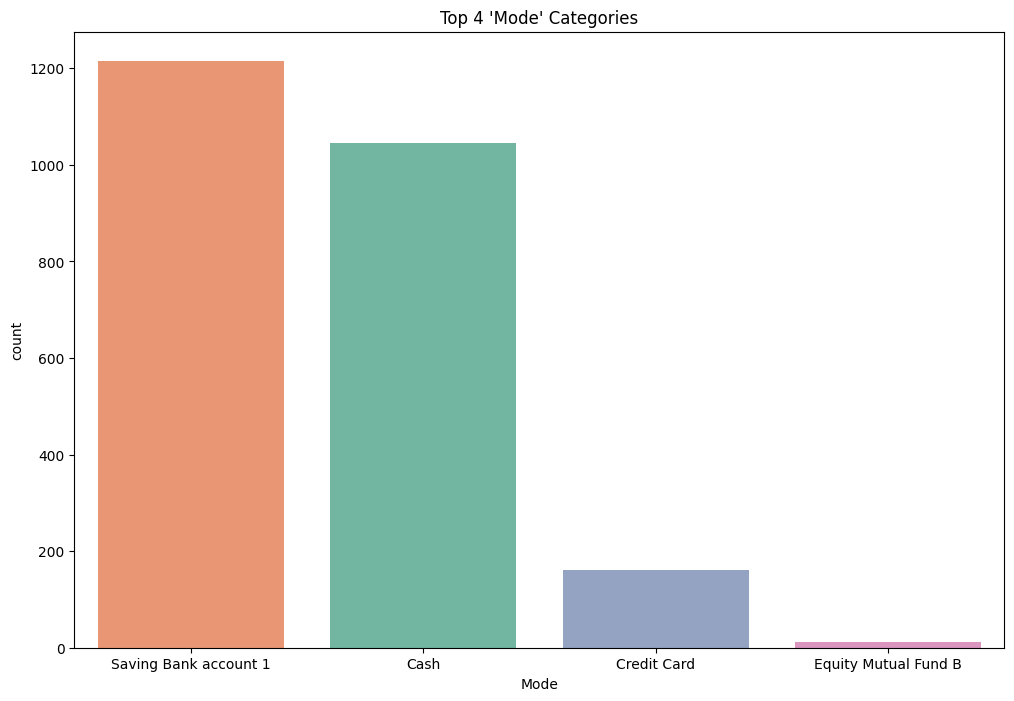

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_n_modes(money, column="Mode", top_n=6, colors=None):
    top_values = money[column].value_counts().iloc[:top_n].index
    money_top = money[money[column].isin(top_values)]

    if colors is None:
        colors = sns.color_palette("Set2", n_colors=top_n)

    plt.figure(figsize=(12, 8))
    sns.countplot(
        data=money_top,
        x=column,
        hue=column,
        order=top_values,
        palette=colors,
        legend=False
    )
    plt.title(f"Top {top_n} '{column}' Categories")
    plt.show()
plot_top_n_modes(money, column="Mode", top_n=4)

In [13]:
%pip install matplotlib.pyplot
%pip install seaborn

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

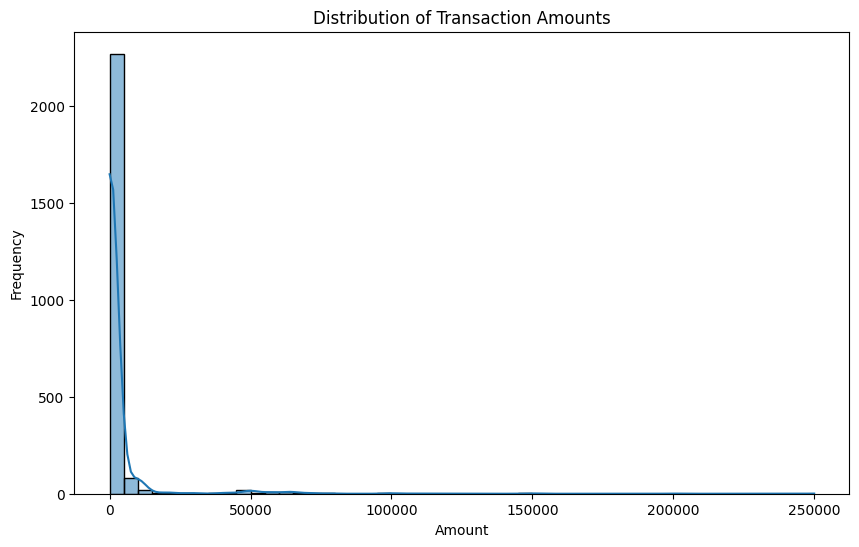

In [15]:
money.describe()

# Distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(money['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


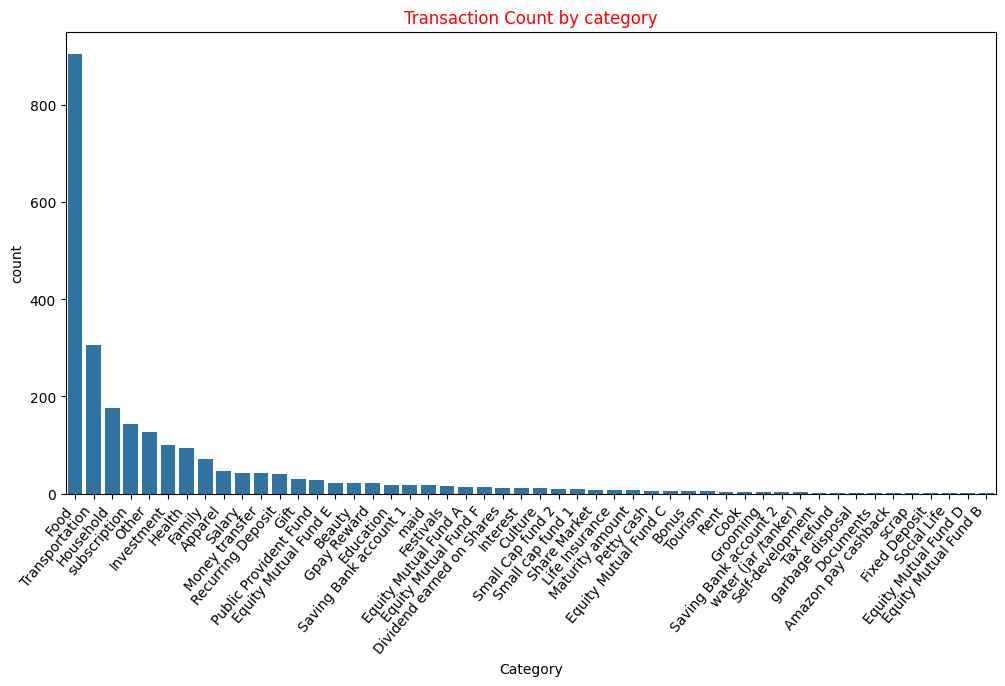

In [16]:
#Transactioncountsbycategory
plt.figure(figsize = (12,6))
sns. countplot(data=money, x='Category', order= money['Category'].value_counts().index)
plt.title('Transaction Count by category',color="red")
plt.xlabel('Category')
plt.ylabel('count')
plt.xticks(rotation=50 , ha="right")
plt.show()

/tmp/ipython-input-1490964937.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  money['Date'] = pd.to_datetime(money['Date'], errors='coerce')


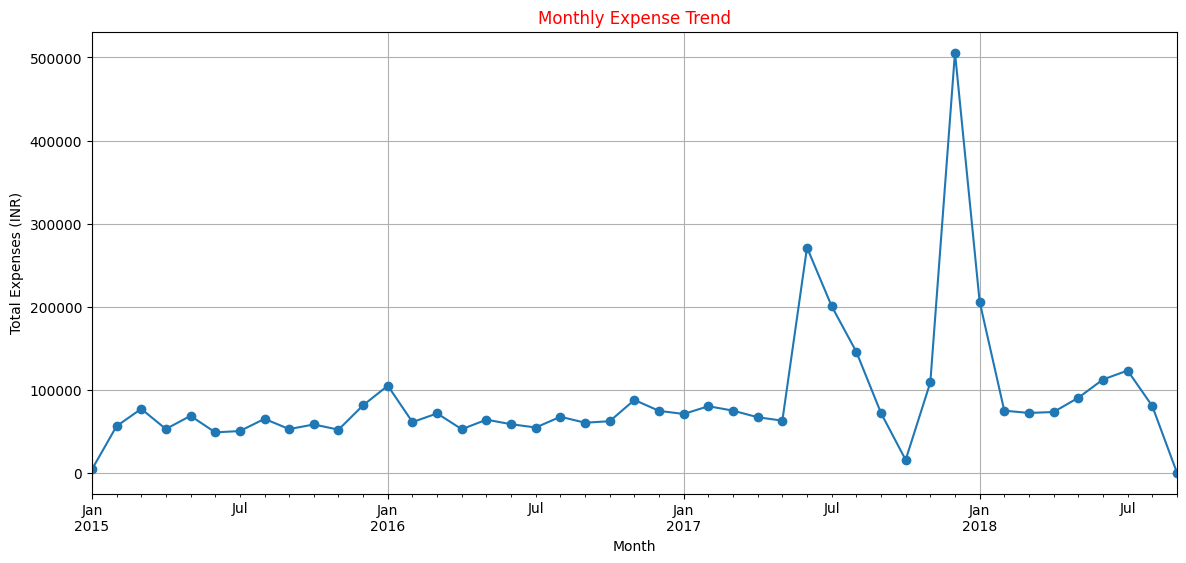

In [17]:
from re import M
# Convert 'Date' to datetime
money['Date'] = pd.to_datetime(money['Date'], errors='coerce')

# Extract year and month
money['YearMonth'] = money['Date'].dt.to_period('M')

monthly_expenses = money.groupby('YearMonth')['Amount'].sum()

plt.figure(figsize=(14, 6))
monthly_expenses.plot(kind='line', marker='o')
plt.title('Monthly Expense Trend',color="red")
plt.xlabel('Month')
plt.ylabel('Total Expenses (INR)')
plt.grid(True)
plt.show()

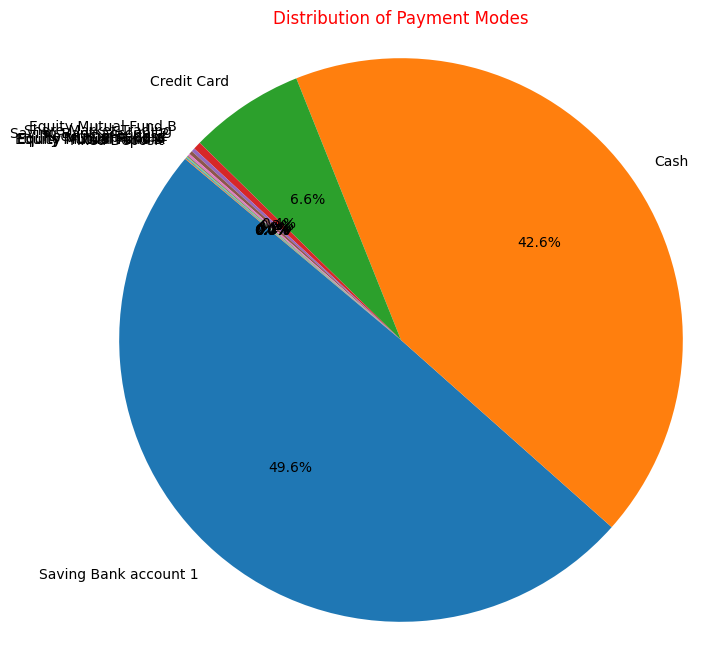

In [18]:
mode_counts = money['Mode'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(mode_counts, labels=mode_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Payment Modes',color="red")
plt.axis('equal')
plt.show()

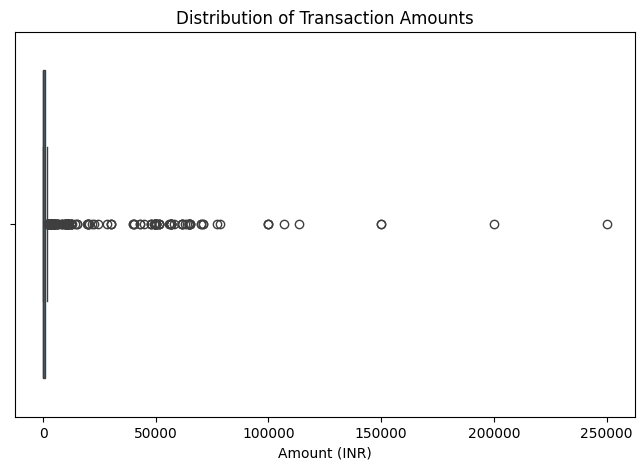

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=money['Amount'])
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount (INR)')
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='Amount'>

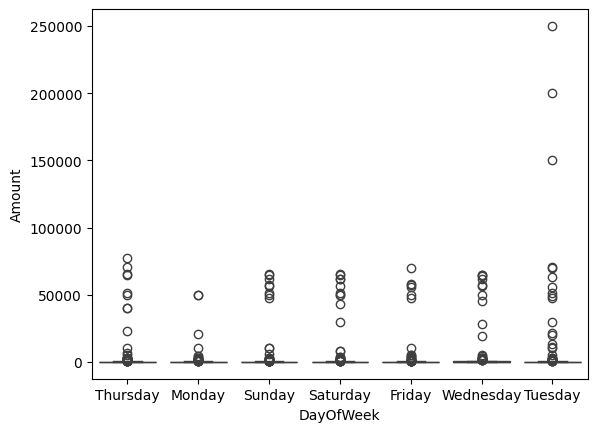

In [21]:
money['DayOfWeek'] = money['Date'].dt.day_name()
sns.boxplot(x='DayOfWeek', y='Amount', data=money)

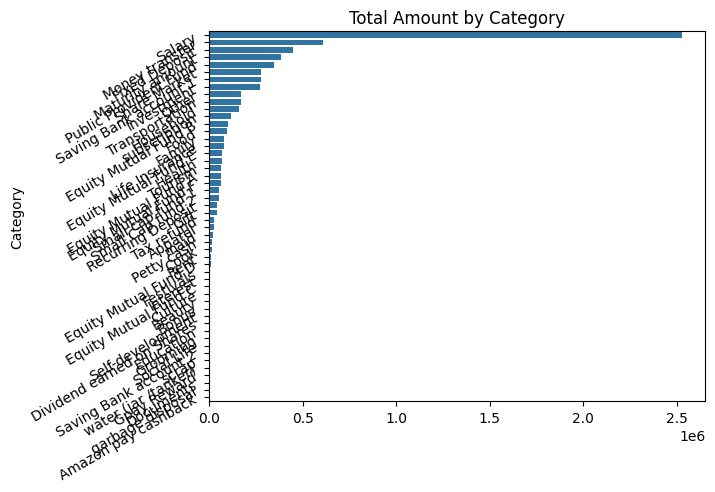

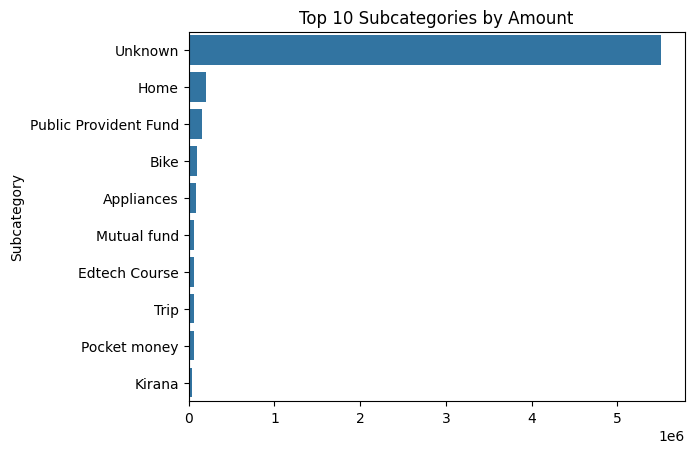

In [22]:
# Category Total
category_sum = money.groupby('Category')['Amount'].sum().sort_values(ascending=False)
sns.barplot(x=category_sum.values, y=category_sum.index)
plt.title('Total Amount by Category')
plt.yticks(rotation=30)
plt.show()

# Subcategory Top 10
top_sub = money.groupby('Subcategory')['Amount'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_sub.values, y=top_sub.index)
plt.title('Top 10 Subcategories by Amount')
plt.show()

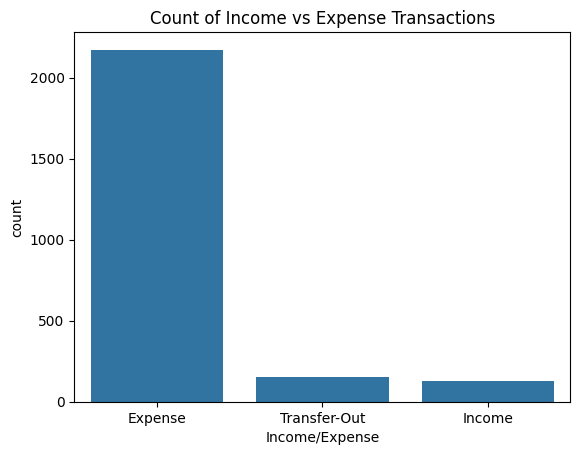

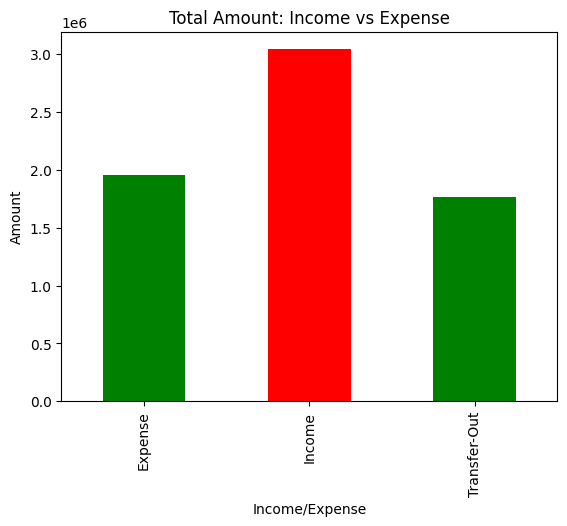

In [23]:
# Count
sns.countplot(x='Income/Expense', data=money)
plt.title('Count of Income vs Expense Transactions')
plt.show()

# Total Amount
income_expense_total = money.groupby('Income/Expense')['Amount'].sum()
income_expense_total.plot(kind='bar', color=['green', 'red'])
plt.title('Total Amount: Income vs Expense')
plt.ylabel('Amount')
plt.show()

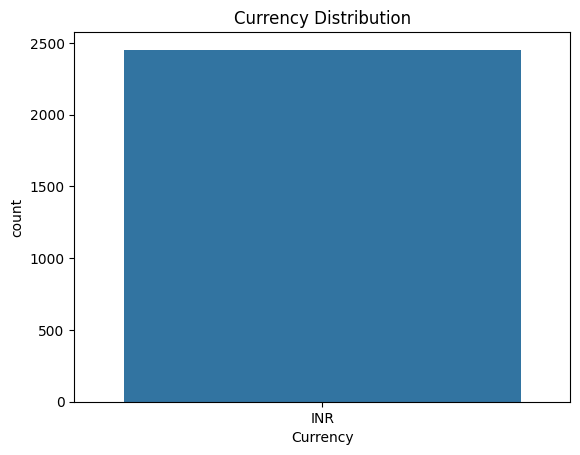

In [24]:
sns.countplot(x='Currency', data=money)
plt.title('Currency Distribution')
plt.show()

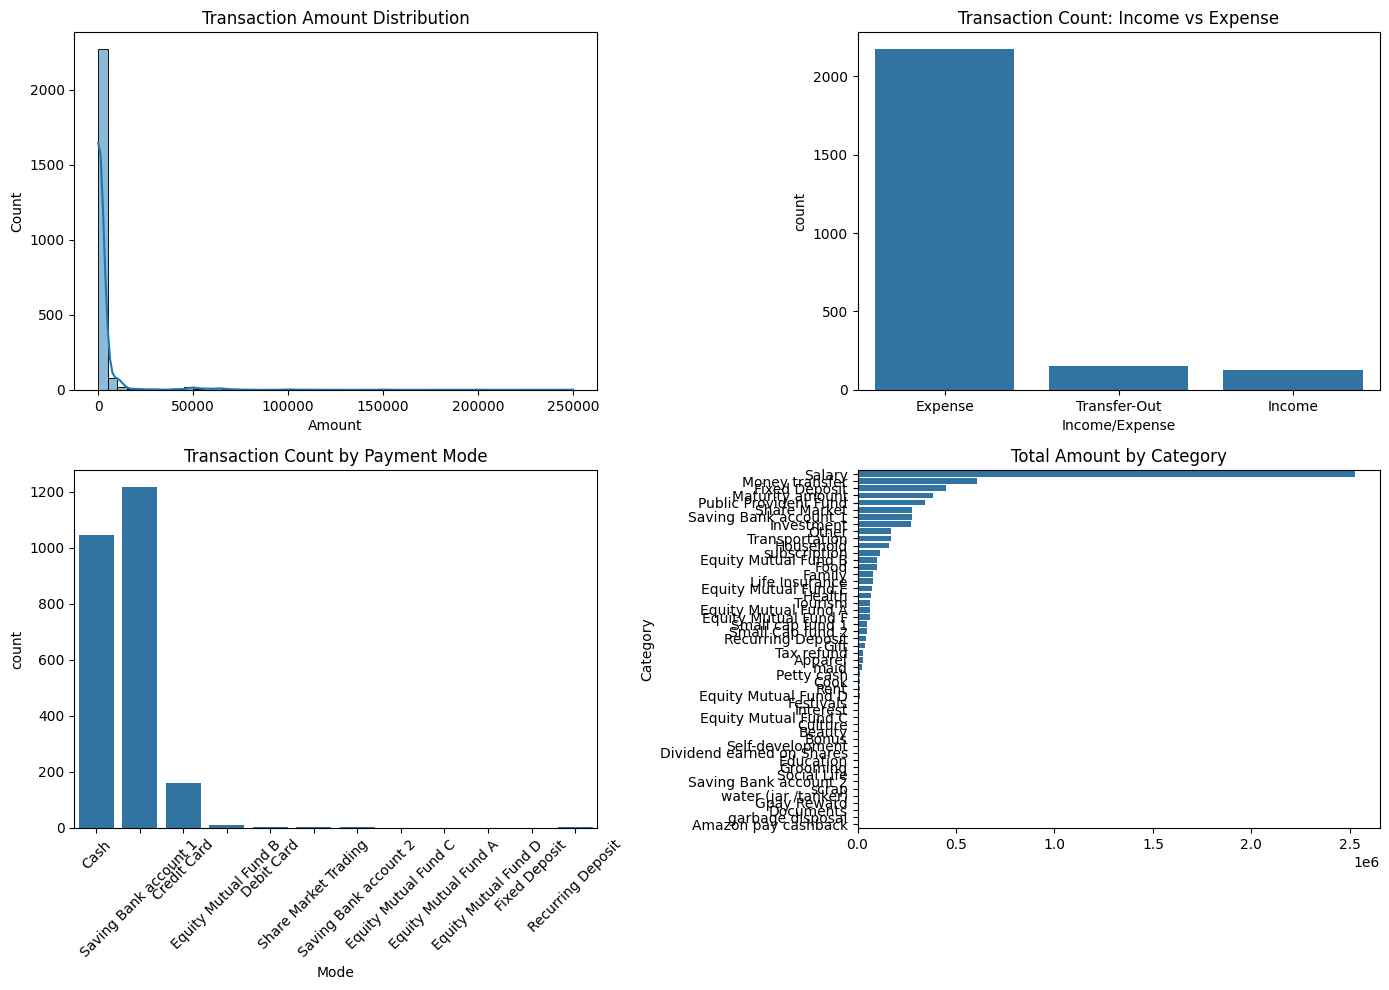

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows, 2 columns

# 1st Plot: Transaction Amount Distribution
sns.histplot(money['Amount'], bins=50, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Transaction Amount Distribution')

# 2nd Plot: Count of Income vs Expense
sns.countplot(x='Income/Expense', data=money, ax=axs[0, 1])
axs[0, 1].set_title('Transaction Count: Income vs Expense')

# 3rd Plot: Spend by Payment Mode
sns.countplot(x='Mode', data=money, ax=axs[1, 0])
axs[1, 0].set_title('Transaction Count by Payment Mode')
axs[1, 0].tick_params(axis='x', rotation=45)

# 4th Plot: Total by Category
category_total = money.groupby('Category')['Amount'].sum().sort_values(ascending=False)
sns.barplot(x=category_total.values, y=category_total.index, ax=axs[1, 1])
axs[1, 1].set_title('Total Amount by Category')

plt.tight_layout()
plt.show()